# 성능 올리기

## 1. Data augmentation (데이터 증강)

- Rotate
- Brightness
- Crop
- Affine transformation
- Cutmix
- RandAuament

### Brigtness

- array에 특정한 상수를 더하거나 곱해서 밝기를 조절
- RGB값이 0-255사이의 값을 가지므로 이 점에 유의
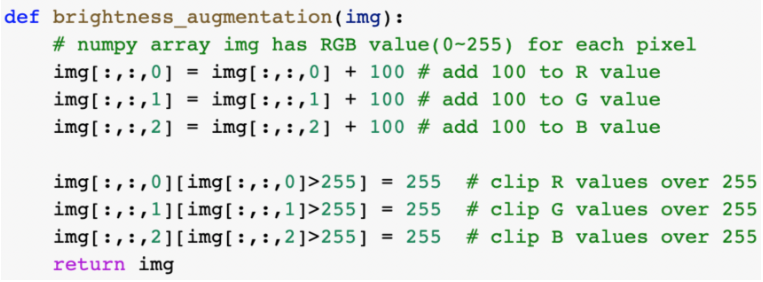

### Rotate

- openCV의 라이브러리를 활용하면 더 쉽게 구현
- cv2.ROTATE_90_CLOCKWISE(시계방향으로 90도 회전)
- cv2.ROTATE_180(180도 회전)
- cv2.ROTATE_90_COUNTERCLOCKWISE(반시계방향으로 90도 회전)
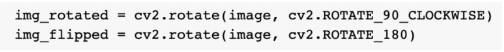

### Flip

- openCV를 활용한 flip
    - cv2.flip(img,1) : 상하 반전
    - cv2.flip(img,0) : 좌우반전
    
- numpy를 활용한 flip
    - np.filpud() : 상하반전
    - np.fliplr() : 좌우반전

### Crop

- 간단하지만 강력한 데이터 증강
- 인덱싱을 활용해 간단히 활용가능

### Affine transformation

- 변환 전 후에도 선은 선으로 유지
- 길이의 비율은 일정하게 유지
- 평행관계가 일정하게 유지
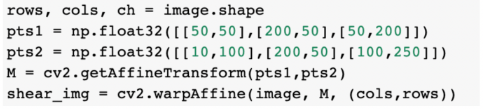


- 입력영상의 3점(pts1)을 사용자가 지정한 3개의 좌표(pts2)로 이동
- 기준 3개의 좌표에 맞춰서 변환 비율을 행렬로 뽑아냄(M)
- 최종 변환 cv2.warpaffine

### CutMix

- 이미지 합성시 합성된 이미지의 비율에 맞춰 레이블도 합성해줘야함
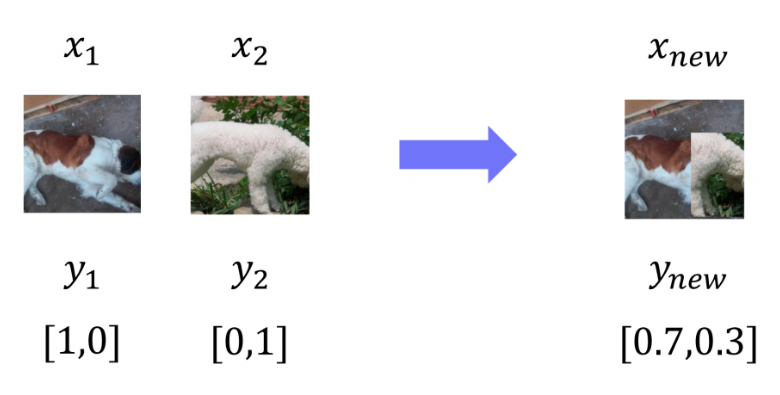

### RandAugment

- 두 개 이상의 기법을 적용할 경우도 많음
- 많은 데이터증강 기법이 존재하기 때문에 어떤조합이 좋을지 탐색하는것에 많은 시간이 걸림
- RandAugment를 사용해 어떤 조합이 가장 좋은 성능을 보여줄지 탐색 가능

## 2. transform Learning(전이학습)
- 적은 데이터로도 좋은 성능을 달성

### 1)
- 사전 학습된 모델에서 마지막 FC layer들만 떼어내고, 새로운 FC layer들로 교체하여 기존 모델 가중치들은 학습시키지 않고(freeze), 새로 교체한 FC layer의 가중치만 업데이트하는 방식
- 적은 파라미터만 학습시키면 되기 때문에 비교적 좋은 성능을 기대

### 2)
- 전체모델을 미세하게 조정하는 방식
- 새로운 FC layer들로 교체하는 것은 동일하지만 Convolution layer의 가중치 또한 업데이트
- 학습된 지식을 최대한 보존하기 위해 Convolution layer의 learning rate는 FC layer에 비해 작은 값으로 설정하여 학습을 진행

### 3) Knowledge Distillation
- 사전에 학습한 Teacher model을 활용하여 그보다 작은 Student model을 학습시키는 방법
- 모델 압축에 주로 활용되는 방법
- 레이블링되지 않은 데이터에 pseudo-lableling(유사라벨링)을 적용하기 위한 목적으로도 활용

#### 방법
1. 학습시킨 Teacher model을 준비, Student model을 초기화
2. 같은 입력에 대한 Teacher model과 Student model의 각 출력을 바탕으로 KL divergence loss(분포의 차이)를 계산하여 Student model을 학습
    - 두 출력간의 분포가 비슷하게 만들어지도록 학습 -> student가 teacher을 모방
    - 레이블링 되지않은 임의의 데이터를 가진경우에도 적용가능
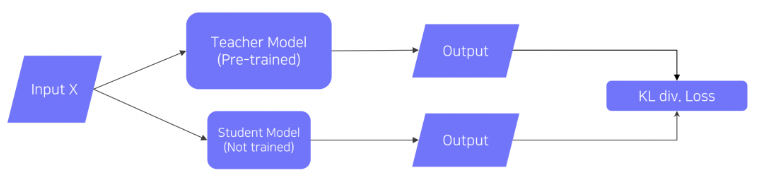

#### 두가지 loss값
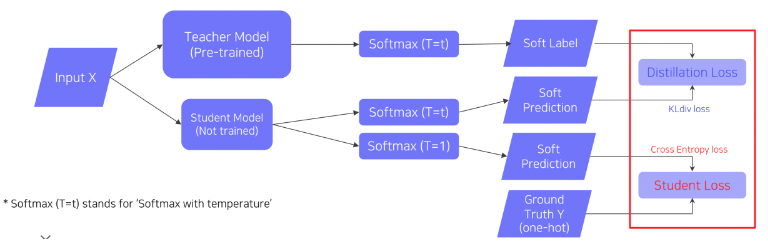
-  KL div.를 계산하는 Distillation Loss 와 Student model의 cross-entropy loss를 계산하는 Student Loss
- Distillation Loss는 Teacher의 행동을 모방하기 위해 활용
- Student Loss는 정답을 맞추기 위해 활용

```
* Teacher model의 경우 hard label(one-hot vector)이 아닌 softmax 출력 값을 그대로 활용하는 soft label의 형태로 결과를 출력

* softmax 함수에 Temerature T값을 인자로 입력
    -> temperature를 입력해주게 되면 보다 smooth한 결과값을 얻을 수 있어 동작을 더 잘 모방하는 결과를 얻음
    
```
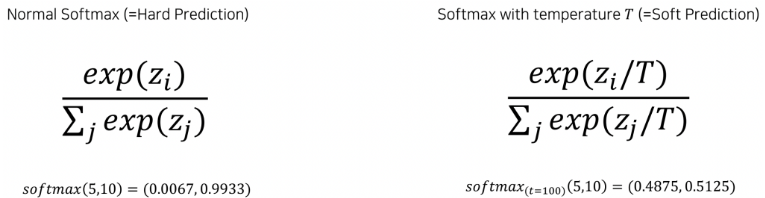

### 4) Leveraging Unlabeled Dataset for Training
레이블링된 데이터가 한정적인 상황에서, 레이블링되지 않은 데이터를 활용하여 성능을 높히는 방법

#### Semi-supervised Learning
- 레이블링된 데이터를 활용하는 것과 더불어 레이블링되지 않은 데이터를 학습에 활용하는방법

1. 레이블 데이터로 학습
2. 1번에서 학습된 모델을 활용해 레이블이 없는 데이터에 레이블을 생성
3. 1번과 2번의 데이터를 활용해 새로운 모델을 학습
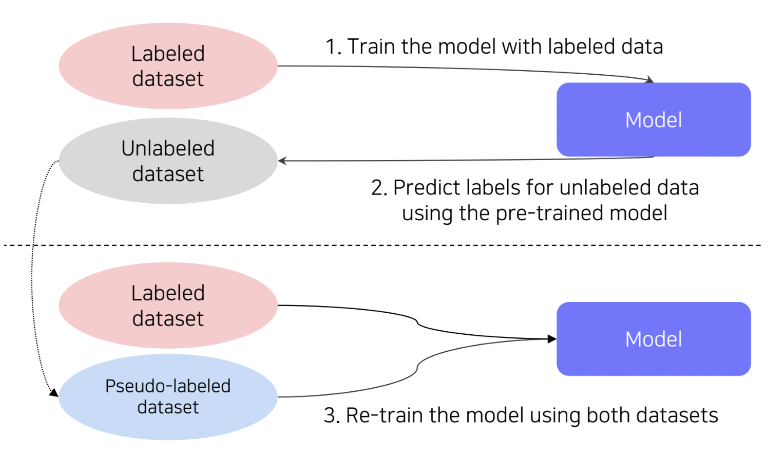

#### Self-training
- Augmentation + Teacher-Student networks + semi-supervised

1. 이미지넷(1M) 데이터를 활용해 Teacher Model을 학습
2. 레이블이 없는 300M의 데이터를 1번 모델을 활용해 레이블링
3. 1과 2번 데이터를 활용해 Student Model을 학습
    - 이 때 Augmentation해 방대한 데이터로 학습
4. 3번에서 만들어진 모델을 Teacher Model로 사용
5. 1-4과정을 반복

```
* 기존의 teacher model보다 student model이 작았던 방식과 달리 student model이 계속해서 커지는 현상이 나타남
```

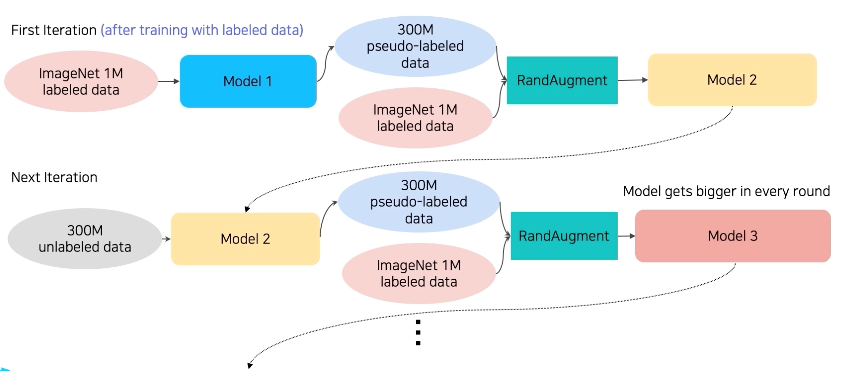